In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cheer_utils

# pd.options.mode.copy_on_write = True

In [2]:
df=cheer_utils.LoadIBTrACS()

/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/cheer_utils.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abssn'].loc[idx]=i


In [3]:
print(df['NATURE'].unique())
# df2['abssn'].iloc[idx]=100
# df2['abssn'].iloc[idx]

['TS' 'ET' 'DS' 'MX' 'NR' 'SS']


In [9]:
# define dicts for filtering circles for case study areas:
a=np.arange(0,370,10)*np.pi/180
rad=3
lo=-76.5
la=34.75
# test track screening circle
# rad= .3
# lo=-77.75
# la=35
nc_circ={'lo': lo,
         'la': la, 
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

rad=3
lo=-94
la=29.5
tx_circ={'lo': lo,
         'la':  la,
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}


dlo, dla = 10, 10
ext={ 0: [tx_circ['lo']-dlo, tx_circ['lo']+dlo, tx_circ['la']-dla, tx_circ['la']+dla],
      1: [nc_circ['lo']-dlo, nc_circ['lo']+dlo, nc_circ['la']-dla, nc_circ['la']+dla]}

sz=20

# add distances to targets
df['dist2nc']=np.sqrt(np.square(df['Longitude']-nc_circ['lo']) + np.square(df['Latitude']-nc_circ['la']))
df['dist2tx']=np.sqrt(np.square(df['Longitude']-tx_circ['lo']) + np.square(df['Latitude']-tx_circ['la']))
df

,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,dist2nc,dist2tx
abssn,,,,,,,,,,,,,,
0,1950,8,12,0,NA,17.1000,-55.5000,NaN,35.0,NaN,930,TS,27.432144,40.447620
0,1950,8,12,3,NA,17.4176,-55.8722,NaN,37.0,NaN,930,TS,26.942870,39.996419
0,1950,8,12,6,NA,17.7000,-56.3000,NaN,40.0,NaN,933,TS,26.433738,39.503544
0,1950,8,12,9,NA,17.9350,-56.8204,NaN,42.0,NaN,924,TS,25.884955,38.936768
0,1950,8,12,12,NA,18.2000,-57.4000,NaN,45.0,NaN,866,TS,25.272762,38.304699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2023,11,17,12,NA,17.0364,-79.8000,1004.0,30.0,100.0,200,NR,18.018369,18.893949
1194,2023,11,17,15,NA,17.4991,-79.1718,1004.0,30.0,150.0,115,NR,17.456577,19.076088
1194,2023,11,17,18,NA,18.0000,-78.5000,1004.0,30.0,200.0,24,NR,16.868980,19.300259


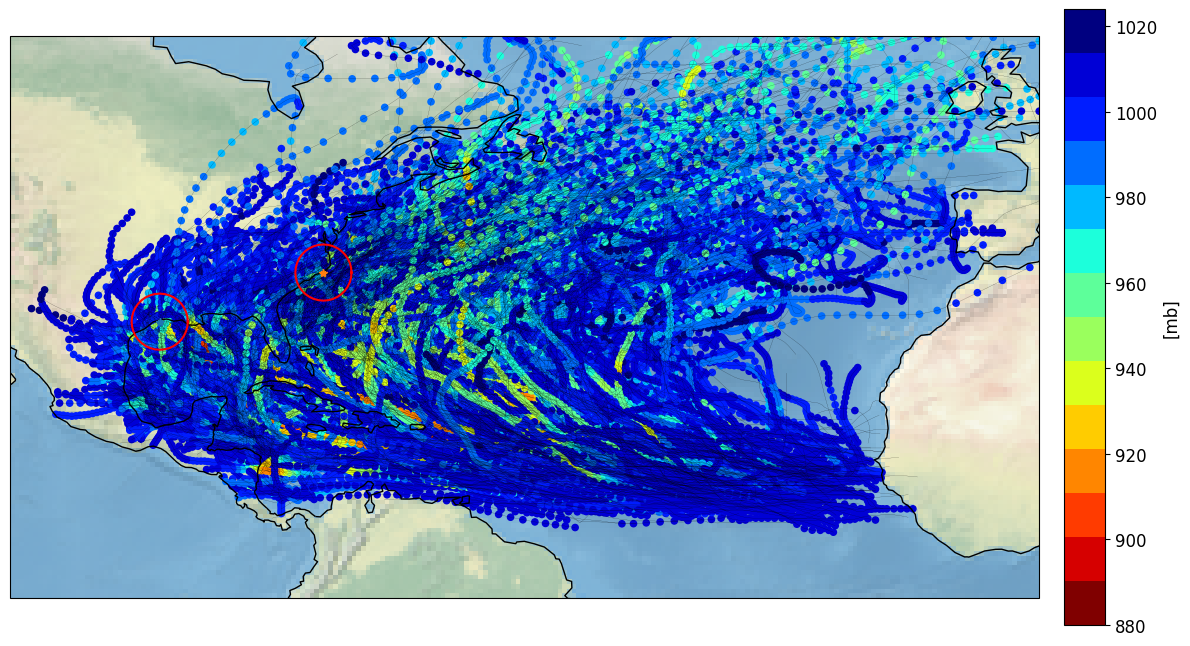

In [5]:

# plot all tracks
fig = plt.figure(figsize=(16, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_xlim([-110, 0])
ax.set_ylim([0, 60])


for i,idx in enumerate(np.unique(df.index)): 
    #print(i,idx)
    #ii=df.index==idx
    #print(ii)
    #break
    x=df.loc[df.index==idx].Longitude
    y=df.loc[df.index==idx].Latitude
    #c=df.loc[df.index==idx].Min_pres
    #c=df.loc[df.index==idx].HollandB
    ax.plot(x, y, linewidth=.1, color='k', transform=ccrs.PlateCarree())
    c=df.loc[df.index==idx].Min_pres.values
    inan=np.isnan(c)
    if not np.all(inan):
        cm=ax.scatter(x=x, y=y, c=c, s=sz, cmap=cheer_utils.cmap, transform=ccrs.PlateCarree(), norm=cheer_utils.norm)

    #axx.plot(x.iloc[0], y.iloc[0], marker='*', color='g')
    #axx.plot(x.iloc[-1], y.iloc[-1], marker='*', color='r')
    #cm=ax.scatter(x=x, y=y, c=c, cmap=cheer_utils.cmap, norm=cheer_utils.norm, s=36)

ax.plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree(),color='r')
ax.plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree(),color='r')

ax.plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())
ax.plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())

cb1 = plt.colorbar(cm, ax=ax, orientation='vertical', pad=0.02, aspect=15, shrink=0.80)
cb1.ax.set_ylabel('[mb]', size=12)
cb1.ax.tick_params(labelsize='large')


In [ ]:
# fig, ax = plt.subplots(nrows=1,ncols=2,
#                            subplot_kw={'projection': ccrs.PlateCarree()},
#                            figsize=(16,7))
# ax=ax.flatten()
    
# ax[0].stock_img()
# ax[0].coastlines()
# ax[1].stock_img()
# ax[1].coastlines()
    
# ax[0].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree())
# ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())

# ax[0].plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())
# ax[1].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())

# for i in range(0,2):
#     ax[i].axis('equal')
#     ax[i].set_ylim(ext[i][2:4])
#     ax[i].set_xlim(ext[i][0:2])
#     ax[i].grid(True)
#     ax[i].stock_img()
#     ax[i].coastlines()

In [7]:
# Find the storm index numbers (abssn) that pass thru the screening circles
# This gets the parts of tracks that enter the circles.  The complete track will be extracted later

df_nc=df.loc[(df['dist2nc'] <= nc_circ['rad']) & (df['NATURE']=='TS')]

df_tx=df.loc[(df['dist2tx'] <= tx_circ['rad']) & (df['NATURE']=='TS')]

# & (df['Min_pres'] <= 980)]

# df_nc=df.loc[(df['dist2nc'] <=nc_circ['rad']) & (df['Category'] > 2)]
# df_tx=df.loc[(df['dist2tx'] <=tx_circ['rad']) & (df['Category'] > 2)]
#idx_nc=np.unique(df_nc.index).astype(int)

idx_nc = df_nc.index.unique()
idx_tx = df_tx.index.unique()
#idx_tx=np.unique(df_tx.index).astype(int)
#print(idx_nc)

print(f'Initial number of NC events = {len(idx_nc)}')
print(f'Initial number of TX events = {len(idx_tx)}')
#df_nc['NATURE'].unique()

Initial number of NC events = 143
Initial number of TX events = 80


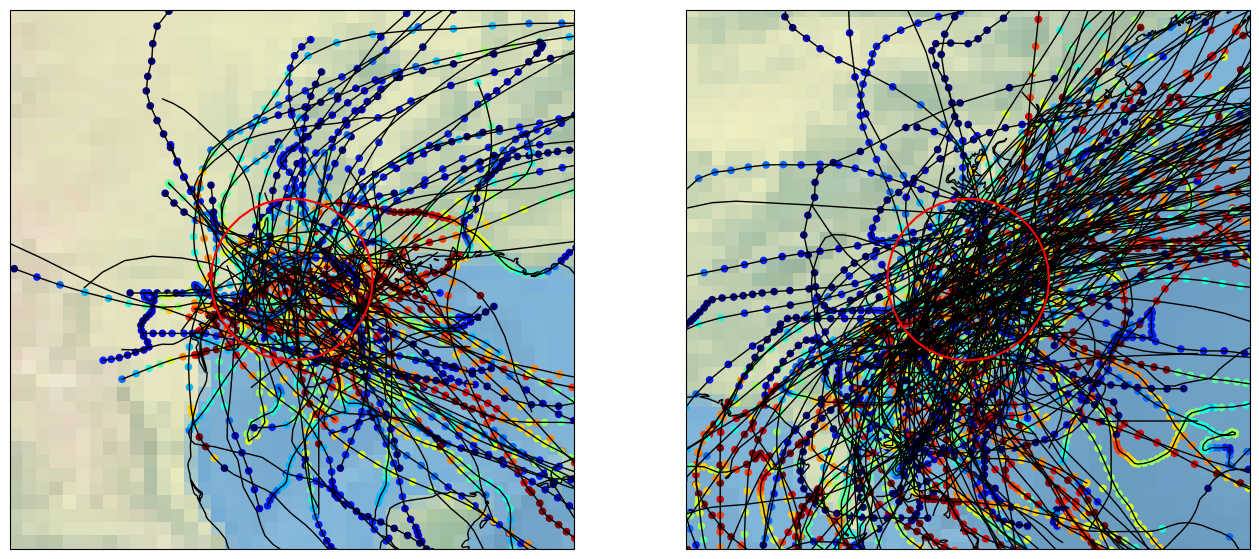

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))
ax=ax.flatten()
    
for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim(ext[i][2:4])
    ax[i].set_xlim(ext[i][0:2])
    ax[i].grid(True)
    ax[i].stock_img()
    ax[i].coastlines()
# ax[1].stock_img()
# ax[1].coastlines()
    

for i,idx in enumerate(idx_tx): 
        x=df.loc[df.index==idx].Longitude
        y=df.loc[df.index==idx].Latitude
        #c=df.loc[df.index==idx].HollandB
        ax[0].plot(x, y, linewidth=1, color='k') # ,marker='o')
        
        c=df.loc[df.index==idx].Min_pres.values
        if not np.all(np.isnan(c)):
            cm=ax[0].scatter(x=x, y=y, c=c, s=sz, cmap=cheer_utils.cmap) # , norm=cheer_utils.norm)
        
ax[0].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree(),color='r')

for i,idx in enumerate(idx_nc): 
        #if i==0:
        #print(i,idx)
        x=df.loc[df.index==idx].Longitude
        y=df.loc[df.index==idx].Latitude
        #c=df.loc[df.index==idx].HollandB
        ax[1].plot(x, y, linewidth=1, color='k') # ,marker='o')

        c=df.loc[df.index==idx].Min_pres.values
        if not np.all(np.isnan(c)):
            cm=ax[1].scatter(x=x, y=y, c=c, s=sz, cmap=cheer_utils.cmap) # , norm=cheer_utils.norm)
        #break
            
ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree(),color='r')

# cb1 = plt.colorbar(cm, ax=ax[1], orientation='vertical', pad=0.02, aspect=15) # , shrink=0.15)
# cb1.ax.set_ylabel('[mb]', size=12)
# cb1.ax.tick_params(labelsize='large')
        

142 1189


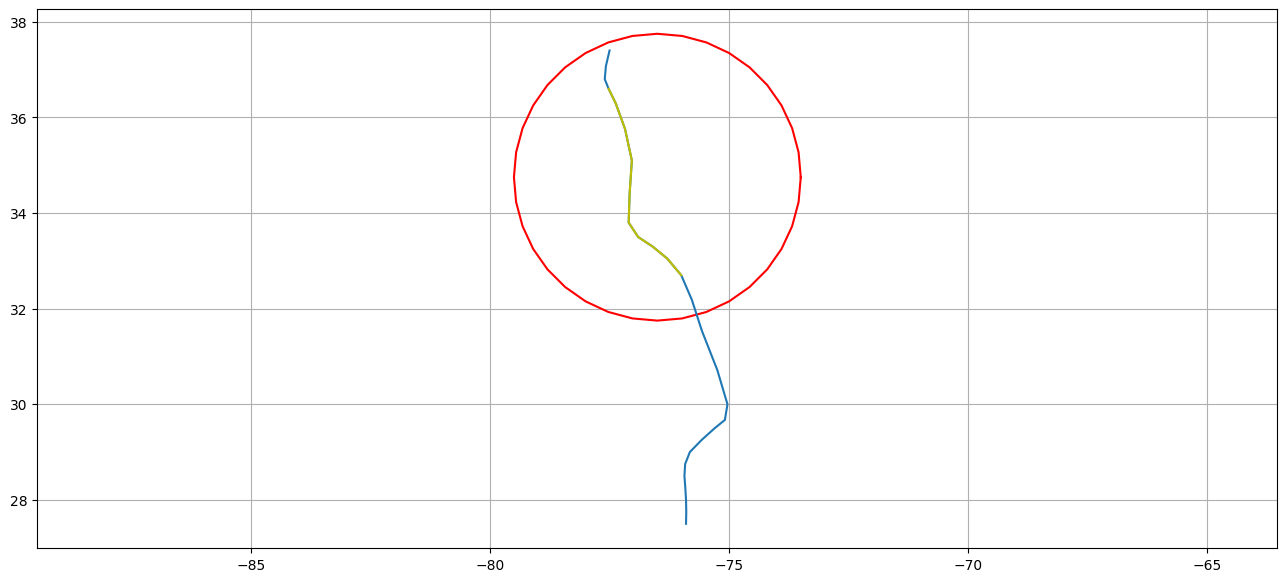

In [11]:
print(i,idx)
fig, ax = plt.subplots(nrows=1,ncols=1,
                       #subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))
plt.plot(nc_circ['cirx'],nc_circ['ciry'],color='r')
x=df.loc[df.index==idx].Longitude
y=df.loc[df.index==idx].Latitude
ax.plot(x,y)
ax.axis('equal')
# ax.set_ylim(ext[1][2:4])
# ax.set_xlim(ext[1][0:2])
ax.grid(True)
x=df_nc.loc[df_nc.index==idx].Longitude
y=df_nc.loc[df_nc.index==idx].Latitude
ax.plot(x,y,color='y')


In [12]:
df_nc.loc[df_nc.index==idx]

,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,dist2nc,dist2tx
abssn,,,,,,,,,,,,,,
1189,2023,9,22,18,NA,32.7000,-76.0000,991.0,55.0,60.0,227,TS,2.110095,18.282232
1189,2023,9,22,21,NA,33.0500,-76.2953,987.0,57.0,60.0,179,TS,1.712280,18.057101
1189,2023,9,23,0,NA,33.3000,-76.6000,984.0,60.0,60.0,145,TS,1.453444,17.810109
1189,2023,9,23,3,NA,33.4976,-76.9000,982.0,60.0,60.0,110,TS,1.314726,17.561059
1189,2023,9,23,6,NA,33.8000,-77.1000,981.0,60.0,60.0,78,TS,1.123610,17.438463
1189,2023,9,23,9,NA,34.3974,-77.0804,981.0,55.0,55.0,28,TS,0.679110,17.614125
1189,2023,9,23,12,NA,35.1000,-77.0333,982.0,50.0,50.0,0,TS,0.637894,17.866978
1189,2023,9,23,15,NA,35.7601,-77.1766,989.0,45.0,45.0,0,TS,1.215767,17.950366
1189,2023,9,23,18,NA,36.3000,-77.3727,996.0,40.0,40.0,0,TS,1.778793,17.964050


Text(0.5, 0, 'Delta-P')

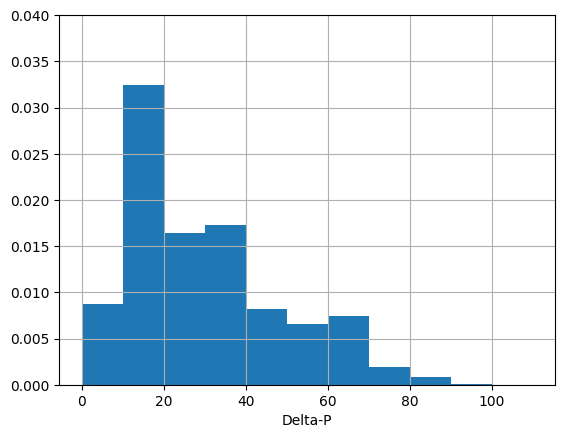

In [13]:
axx=(-(df_nc['Min_pres']-1020)).hist( density=True, bins=range(0,120,10))
axx.set_ylim([0, .040])
axx.set_xlabel('Delta-P')

In [14]:
df_nc

,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,dist2nc,dist2tx
abssn,,,,,,,,,,,,,,
0,1950,8,19,21,NA,32.2048,-75.4164,NaN,110.0,NaN,296,TS,2.766267,18.779407
0,1950,8,20,0,NA,32.8000,-75.2000,NaN,110.0,NaN,243,TS,2.343608,19.087430
0,1950,8,20,3,NA,33.5620,-74.8466,NaN,107.0,NaN,198,TS,2.035946,19.579392
0,1950,8,20,6,NA,34.4000,-74.3000,NaN,105.0,NaN,184,TS,2.227667,20.300246
0,1950,8,20,9,NA,35.2002,-73.5597,NaN,102.0,NaN,184,TS,2.974566,21.220230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2023,9,23,9,NA,34.3974,-77.0804,981.0,55.0,55.0,28,TS,0.679110,17.614125
1189,2023,9,23,12,NA,35.1000,-77.0333,982.0,50.0,50.0,0,TS,0.637894,17.866978
1189,2023,9,23,15,NA,35.7601,-77.1766,989.0,45.0,45.0,0,TS,1.215767,17.950366


<GeoAxesSubplot: xlabel='Longitude'>

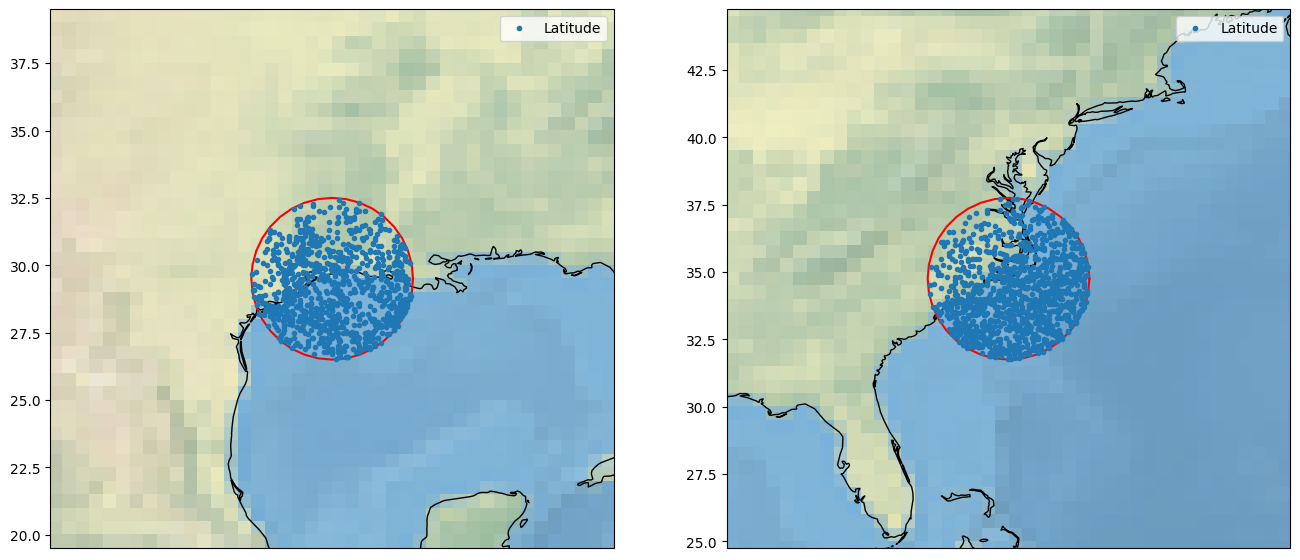

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))
ax=ax.flatten()
    
for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim(ext[i][2:4])
    ax[i].set_xlim(ext[i][0:2])
    ax[i].grid(True)
    ax[i].stock_img()
    ax[i].coastlines()
    
ax[0].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree(),color='r')
ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree(),color='r')
df_tx.plot(x='Longitude',y='Latitude',ax=ax[0],linestyle='',marker='.',transform=ccrs.PlateCarree())
df_nc.plot(x='Longitude',y='Latitude',ax=ax[1],linestyle='',marker='.',transform=ccrs.PlateCarree())
